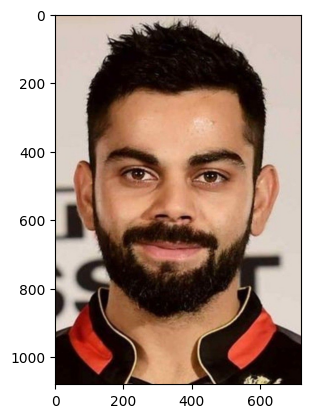

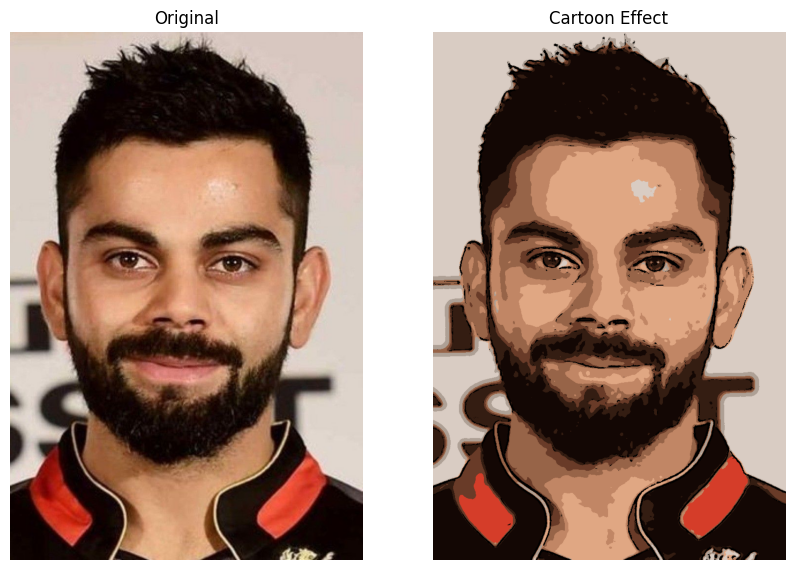

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image

def read_file(filename):
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img)
    plt.show()
    return img

filename ="virat_image.jpg"
img = read_file(filename)

org_img = np.copy(img)

# Create Edge Mask
def edge_mask(img, line_size, blur_value):
    """
    input: Input Image
    output: Edge of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY, line_size, blur_value)
    return edges

# Cartoon effect: color smoothing

def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1, 3))
    # Determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)

# Apply bilateral filter to smooth colors
filtered = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Color quantization (reduce number of colors)
k = 9
quantized = color_quantization(filtered, k)

# Combine edge mask with quantized image
cartoon = cv2.bitwise_and(quantized, quantized, mask=edges)

# Show results
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Cartoon Effect')
plt.imshow(cartoon)
plt.axis('off')
plt.show()

# Reduce the Color Palette

In [26]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1, 3))
    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    Center = np.uint8(center)
    result = Center[label.flatten()]
    result = result.reshape(img.shape)
    return result

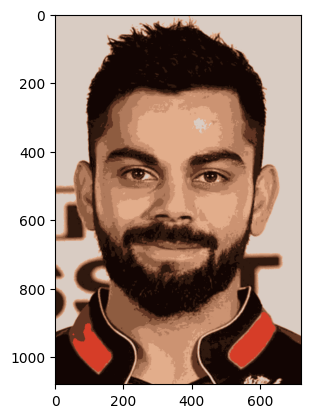

In [27]:
img = color_quantization(img , k=9)

plt.imshow(img)
plt.show()

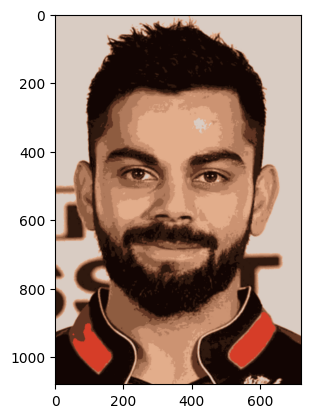

In [28]:
# Reduce the noise
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)
plt.imshow(blurred)
plt.show()

# Combine Edge Mark with quantiz image

In [32]:
def cartoon(blurred, edges):
  c = cv2.bitwise_and(blurred, blurred, mask = edges)
  plt.imshow(c)
  plt.show("Cartoonified Image")
  plt.imshow(org_img)
  plt.title("org_img")
  plt.show()

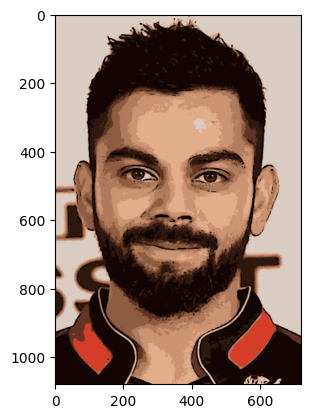

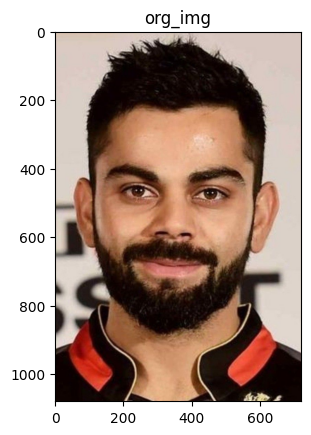

In [33]:
cartoon(blurred, edges)